#  Read the Data

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from csv file

df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Understanding the data

In [4]:
#Check for Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#There are null values hence we have do some imputation or remove the columns depending on the column information

In [7]:
# Checking for percentage nulls of each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
#check for columns with Null values greater than 1

In [9]:
round(100*(df.isnull().sum()/len(df.index)), 2)[round(100*(df.isnull().sum()/len(df.index)), 2)>0]

LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [10]:
#According to the dictionary some of the columns where NA is present it means there is no access hence we cant consider those as NA and hence we can replace those with None

In [11]:
replace_none = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature","GarageYrBlt"]
for i in replace_none:
    df[i].fillna("none", inplace=True)

In [12]:
#Now we need to check for Null values that are greater than 0

In [13]:
final_null=round(100*(df.isnull().sum()/len(df.index)), 2)[round(100*(df.isnull().sum()/len(df.index)), 2)>0]

In [14]:
final_null

LotFrontage    17.74
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [15]:
#Replace the null values with Mdeian
for i in final_null.index:
    print(df[i].describe())
    
    

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


In [16]:
#We can see MasVnrArea is not evenly distrubted and Electrical is categorical value hence we can drop those two rows with nulls since we have less than 1 % null values

In [17]:
df.shape

(1460, 81)

In [18]:
df.dropna(subset=['MasVnrArea'], inplace=True)
df.dropna(subset=['Electrical'], inplace=True)

In [19]:
df.shape

(1451, 81)

In [20]:
# Will find if there are any duplicate values or not
print("Before dropping duplicates the shape of the data set is :",df.shape)
print("After dropping duplicates the shape of the data set is :",df.drop_duplicates().shape)

Before dropping duplicates the shape of the data set is : (1451, 81)
After dropping duplicates the shape of the data set is : (1451, 81)


# Visulazing the data for better understanding data

In [21]:
#Since there are so many features we will keep the features that have some corelation with the target variable sales price

In [22]:
Numerical = list(df.select_dtypes(include=['float64', 'int64']).columns)
Numerical.remove('SalePrice')

Categorical = list(df.select_dtypes(exclude=['float64', 'int64']).columns)
Target=['SalePrice']

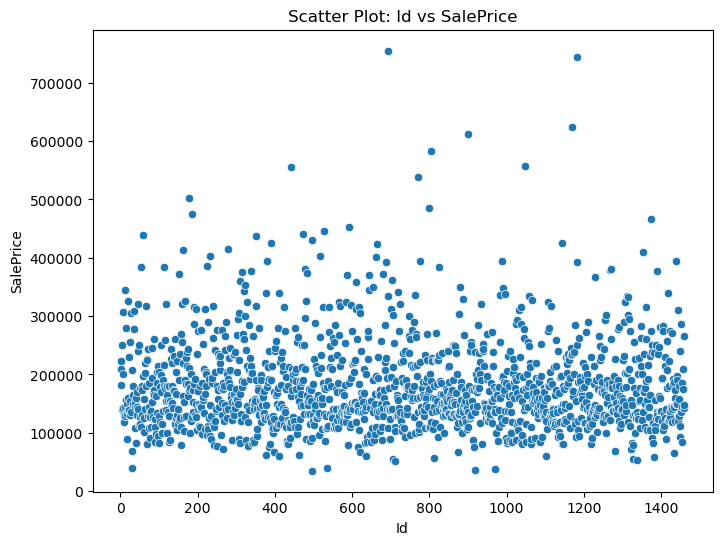

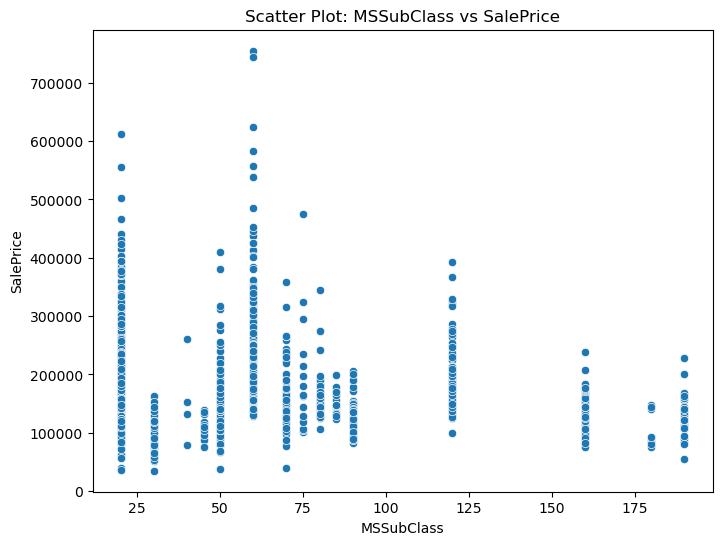

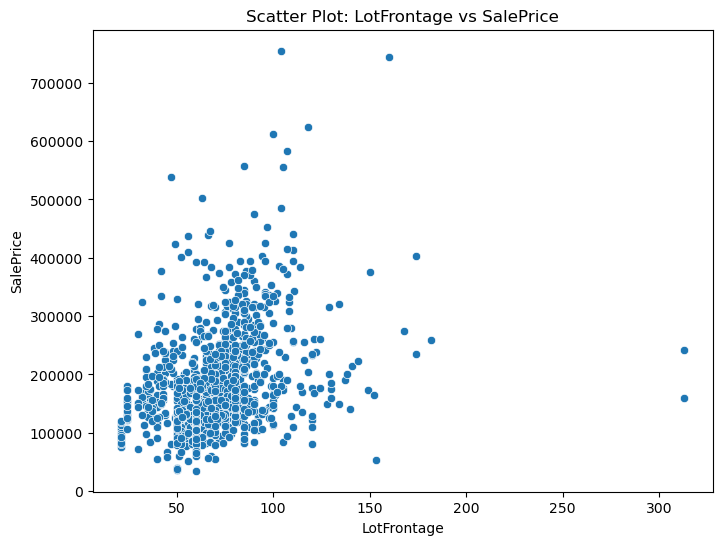

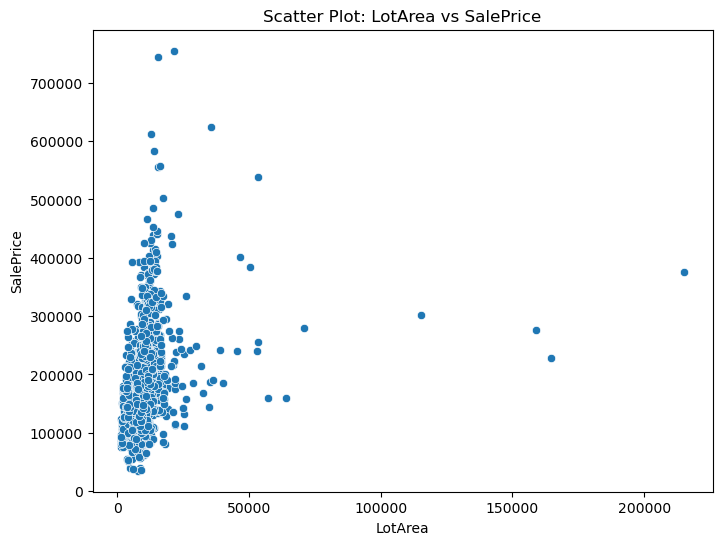

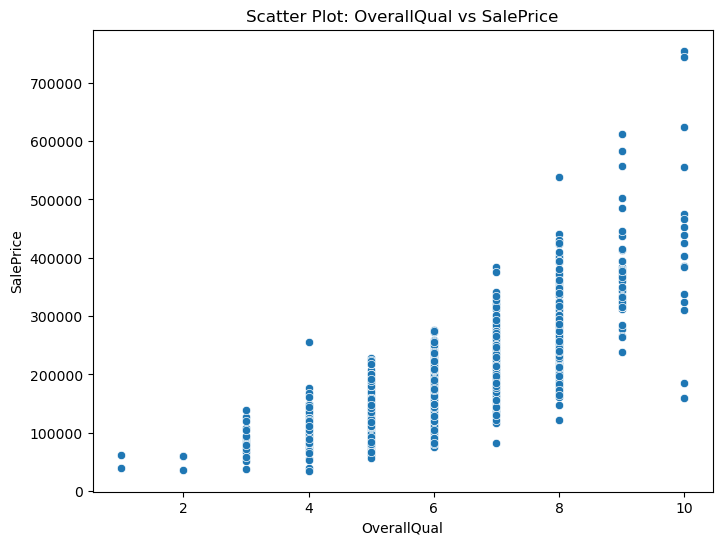

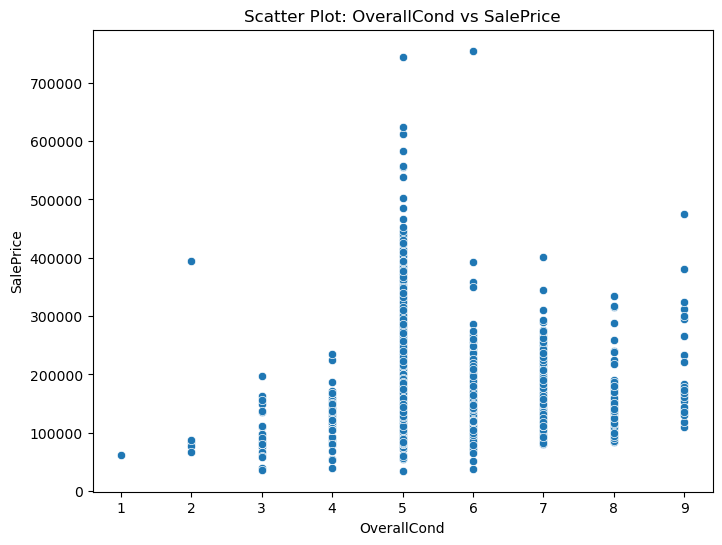

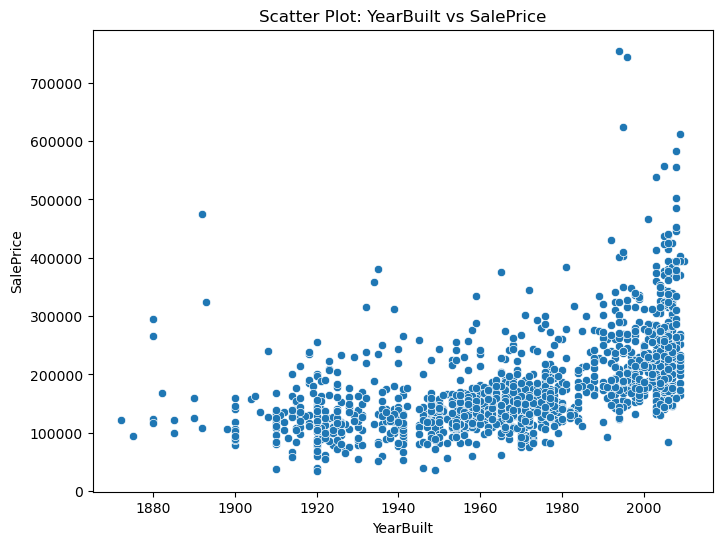

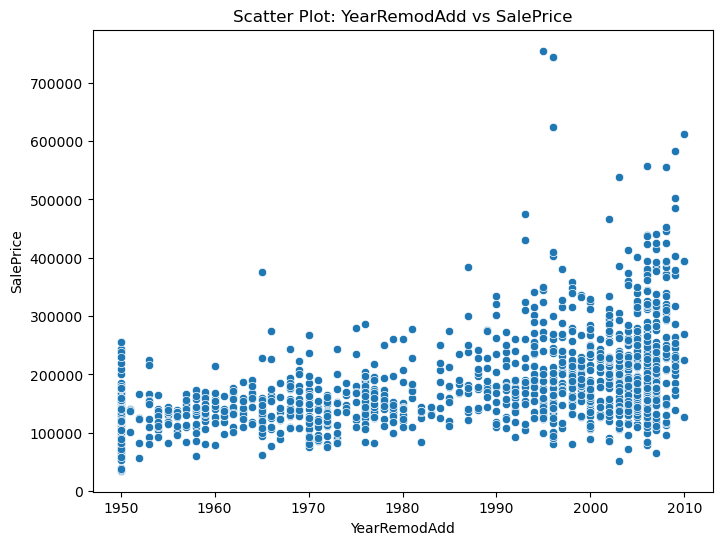

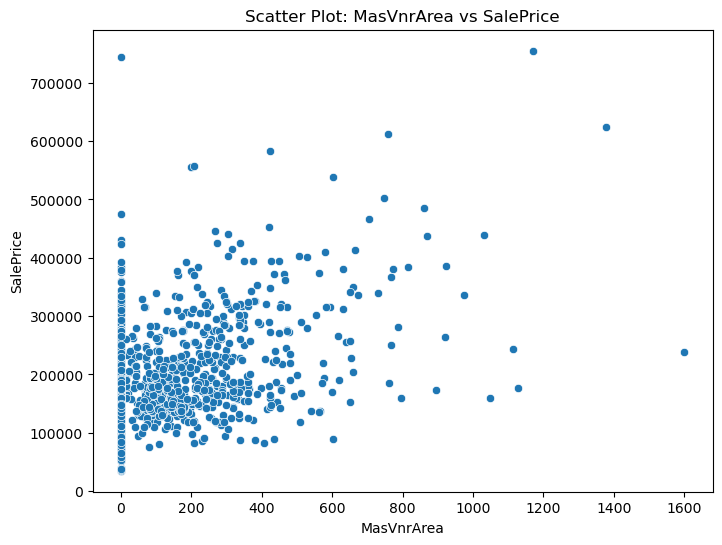

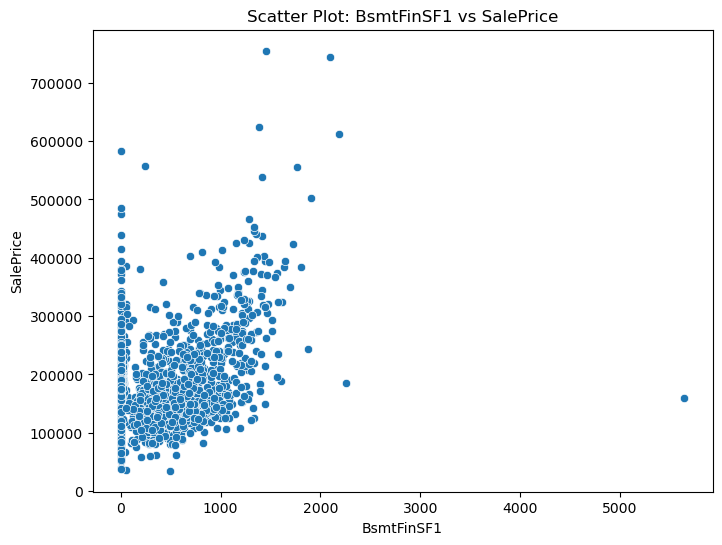

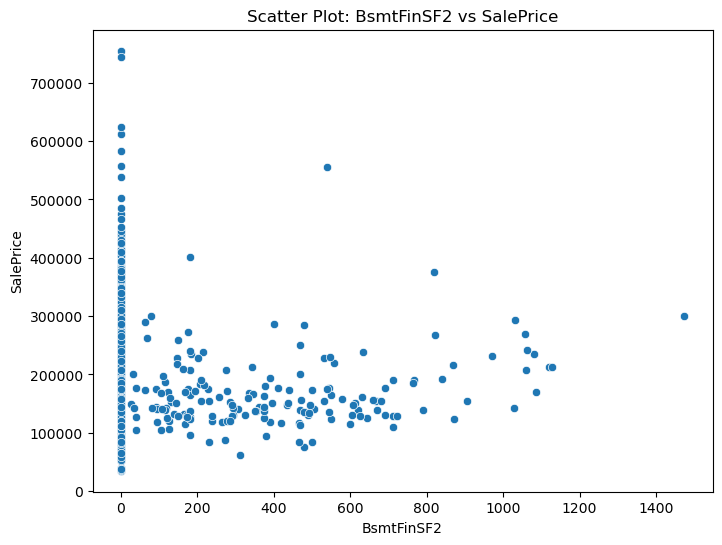

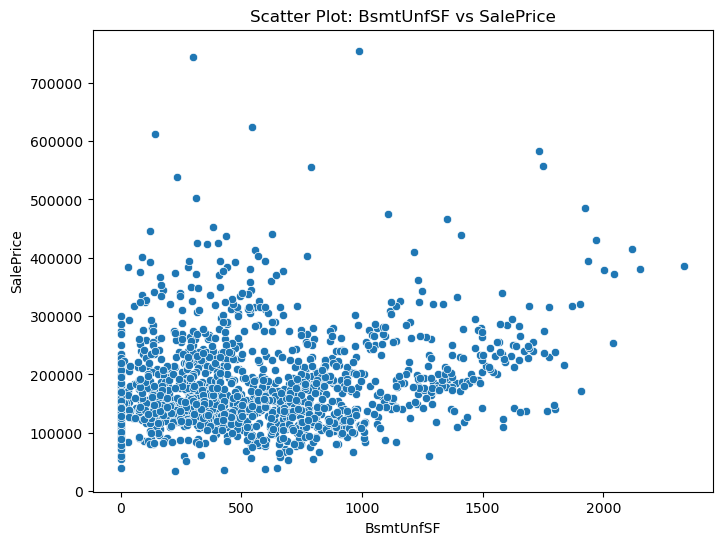

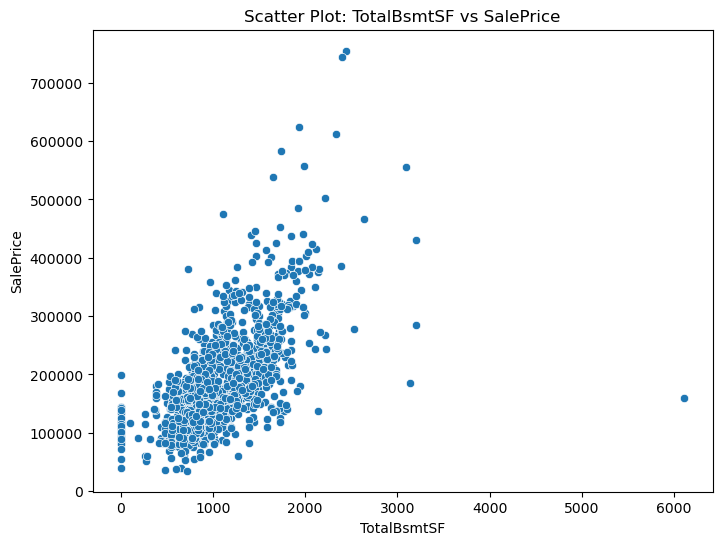

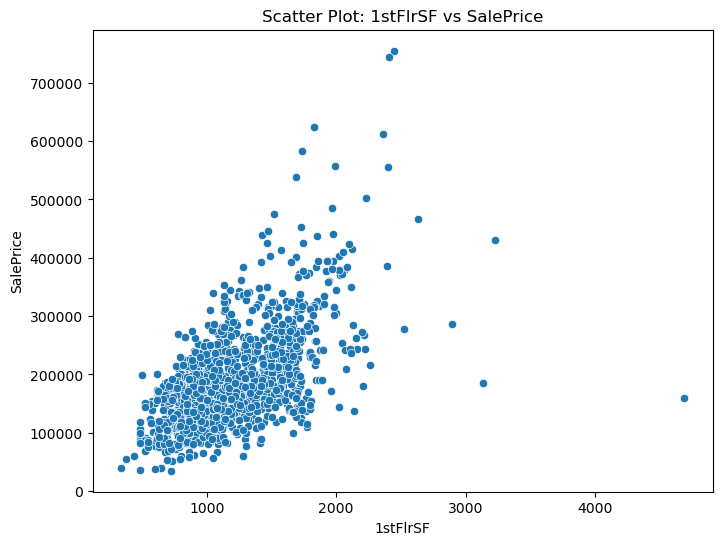

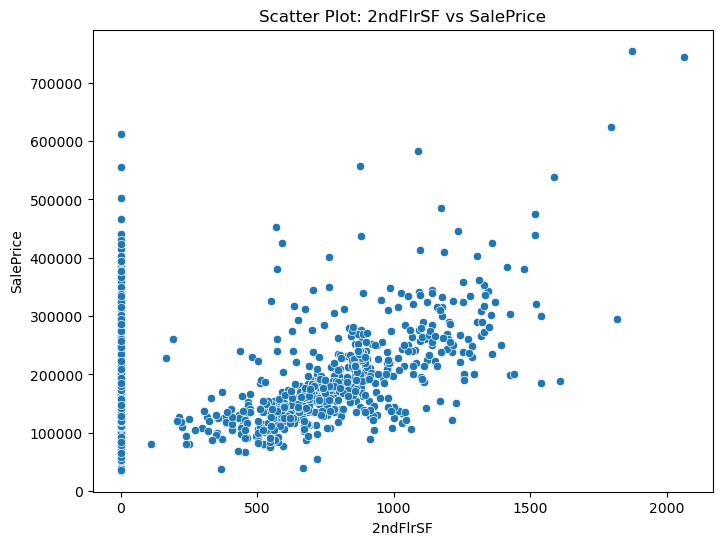

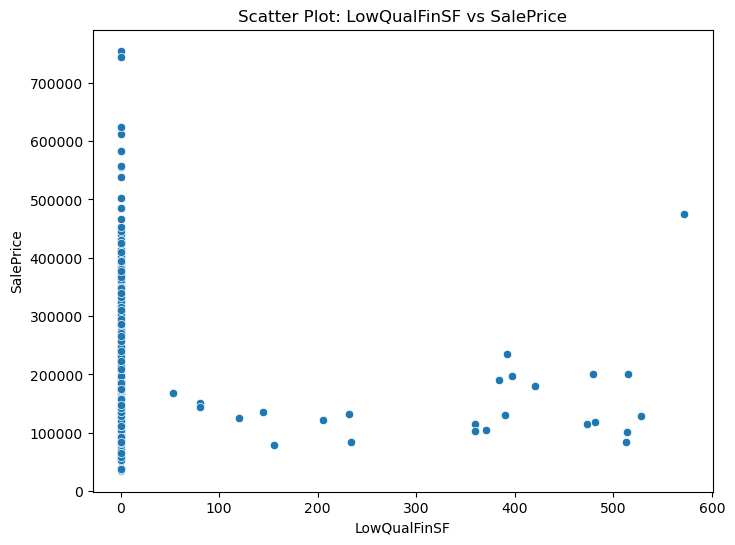

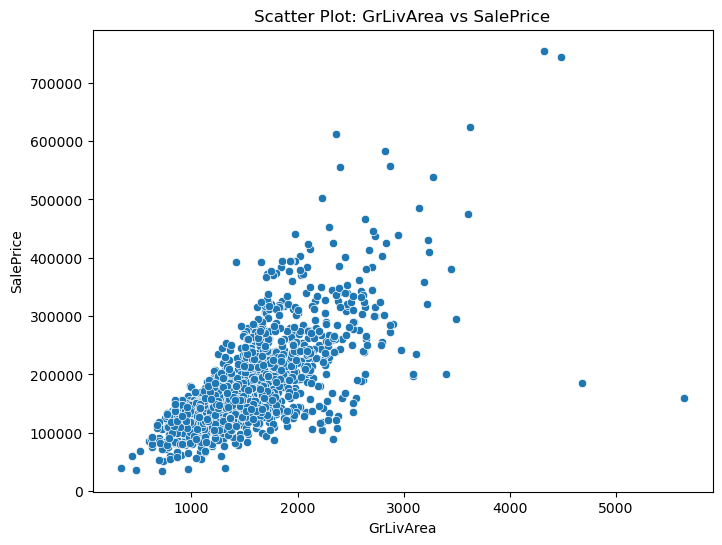

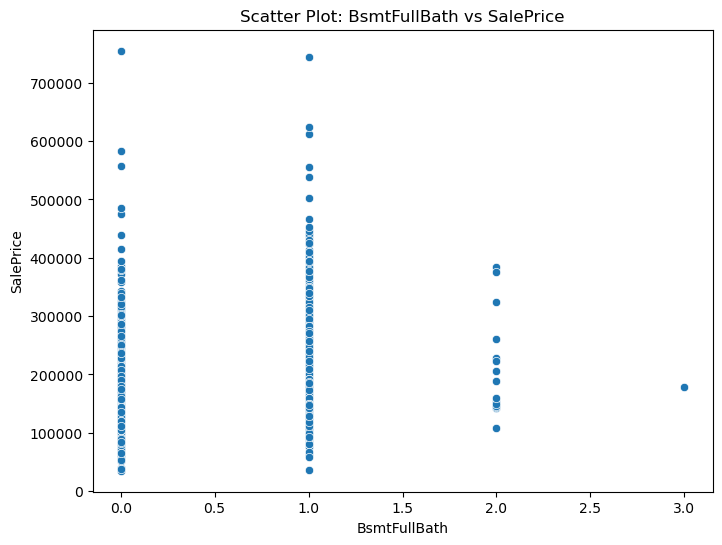

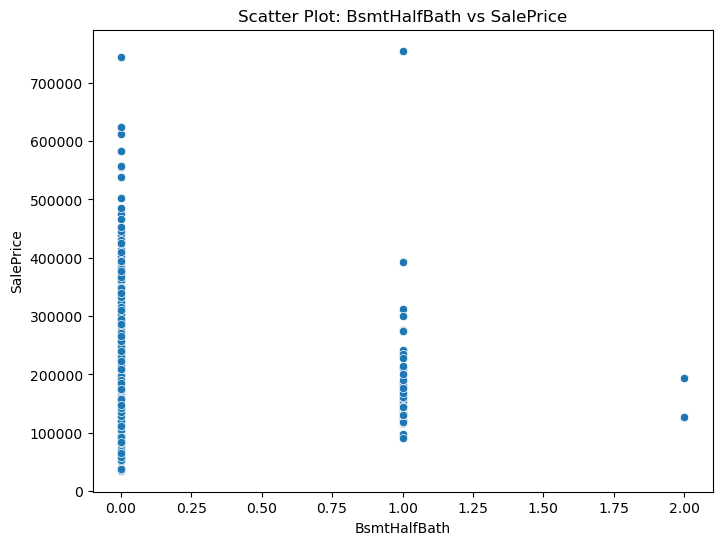

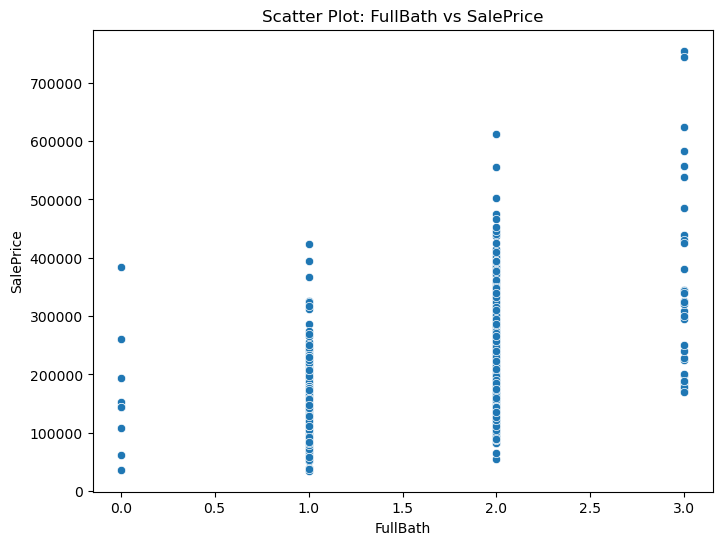

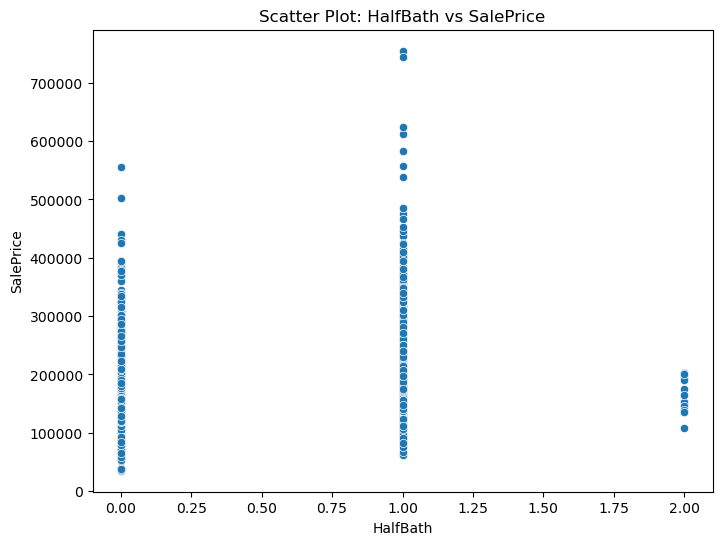

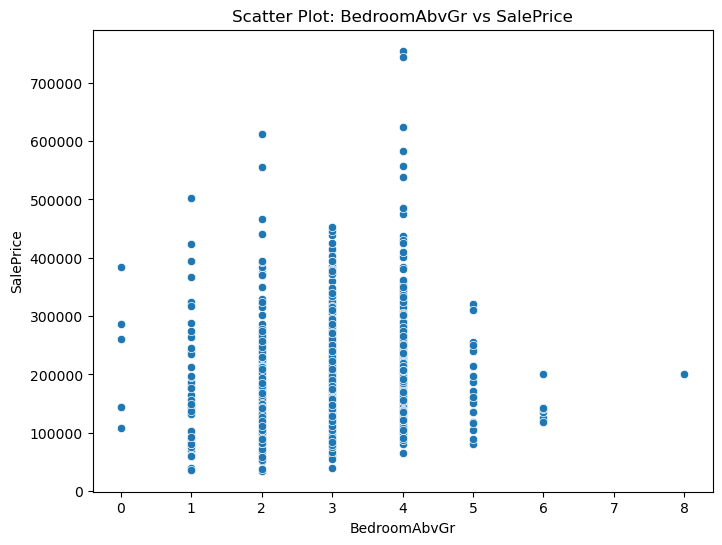

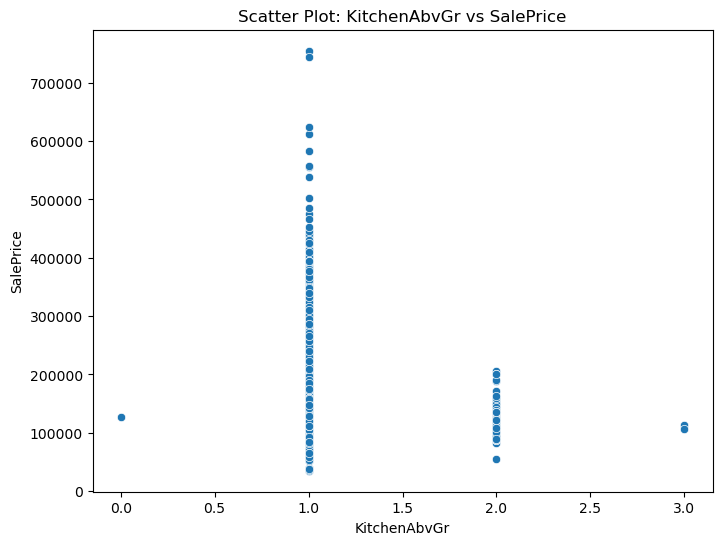

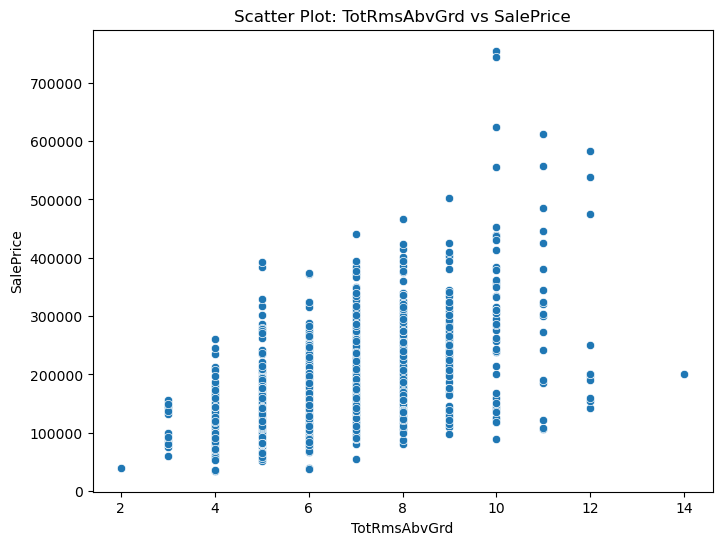

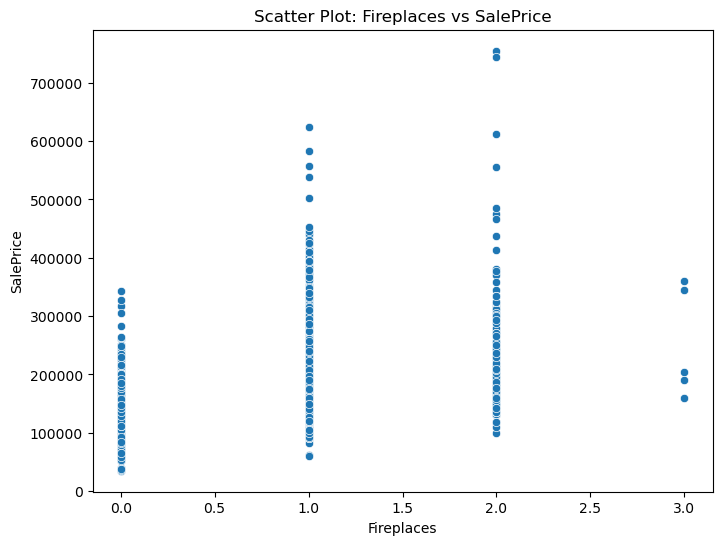

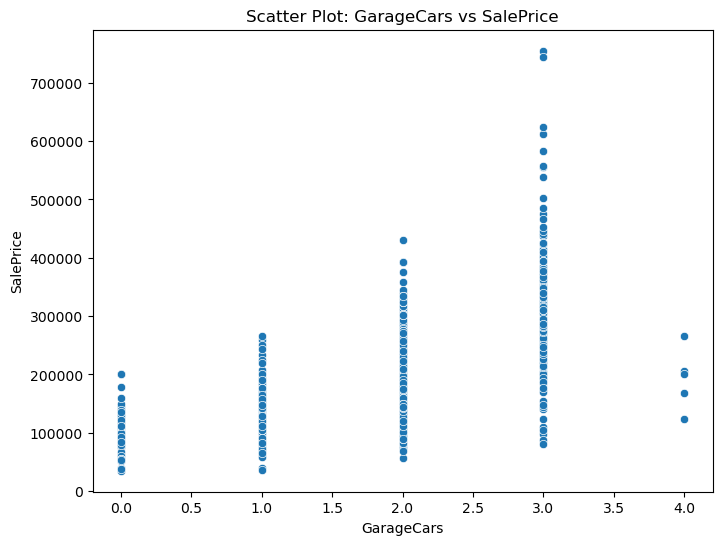

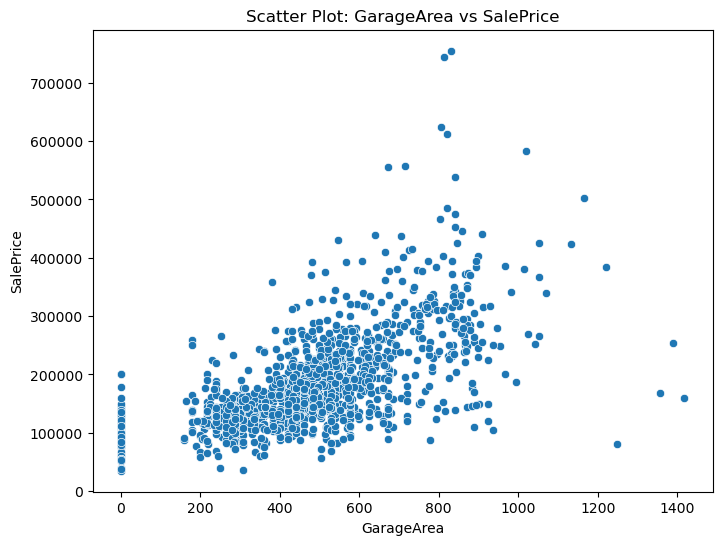

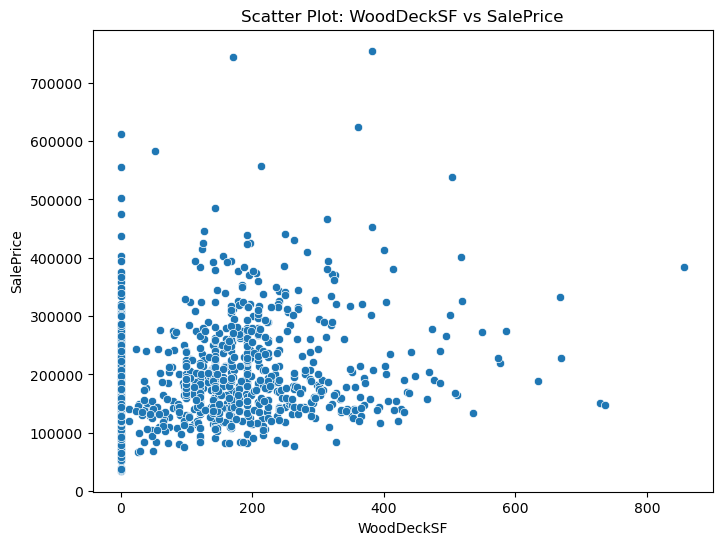

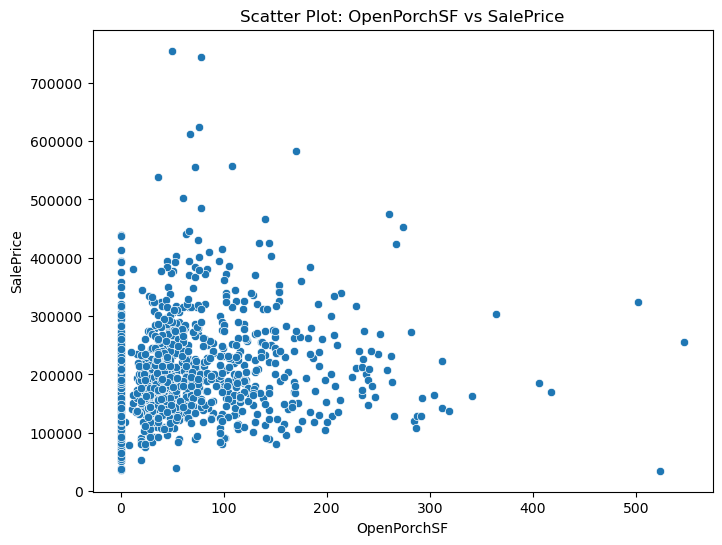

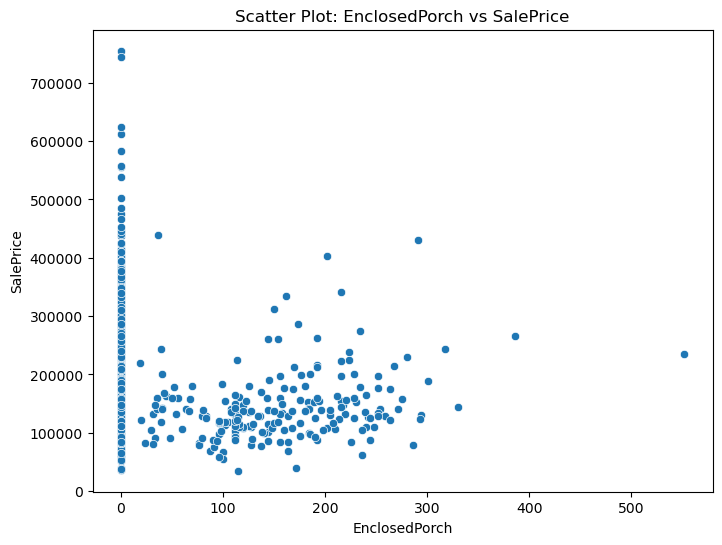

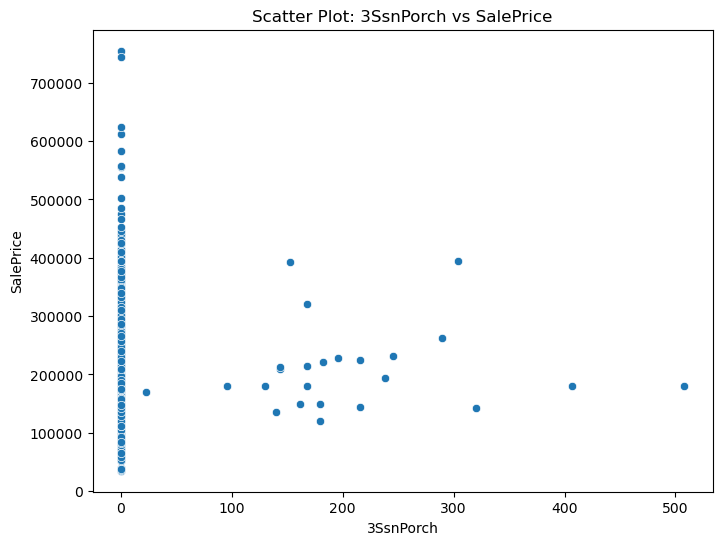

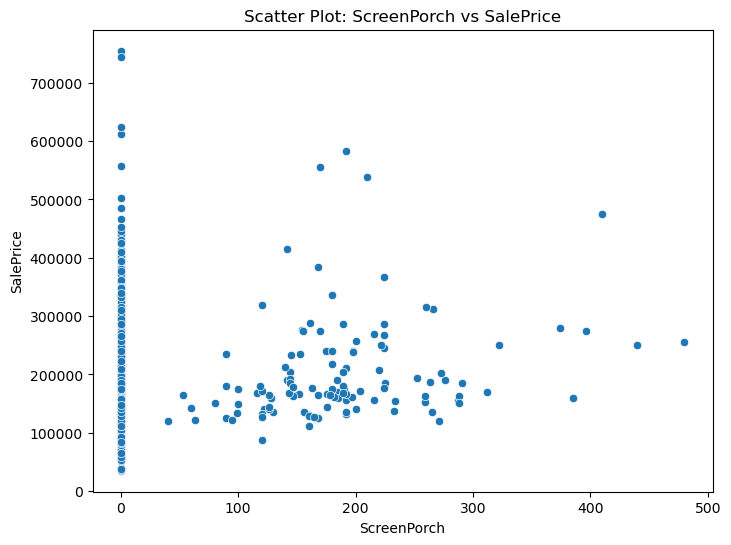

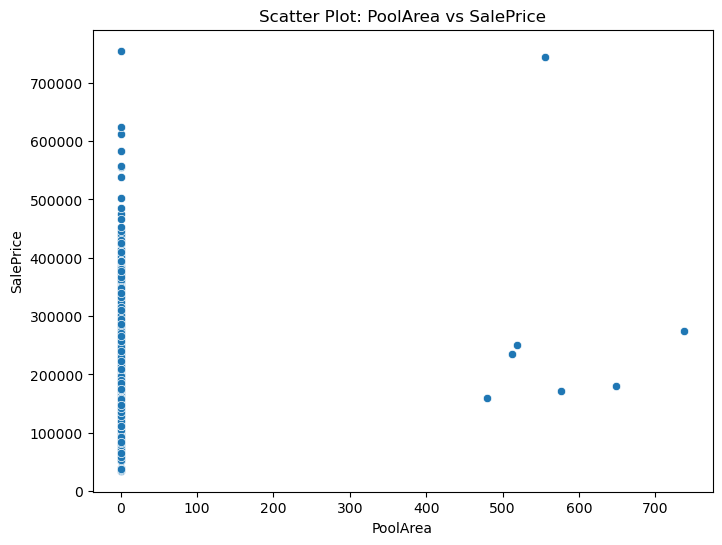

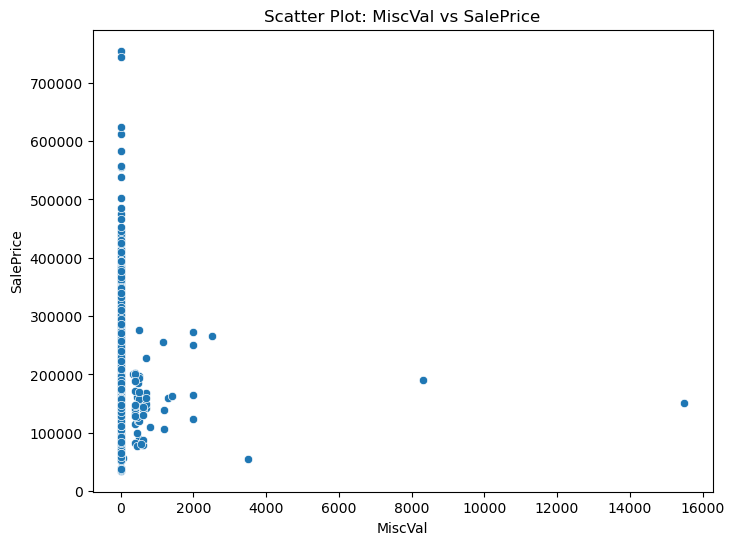

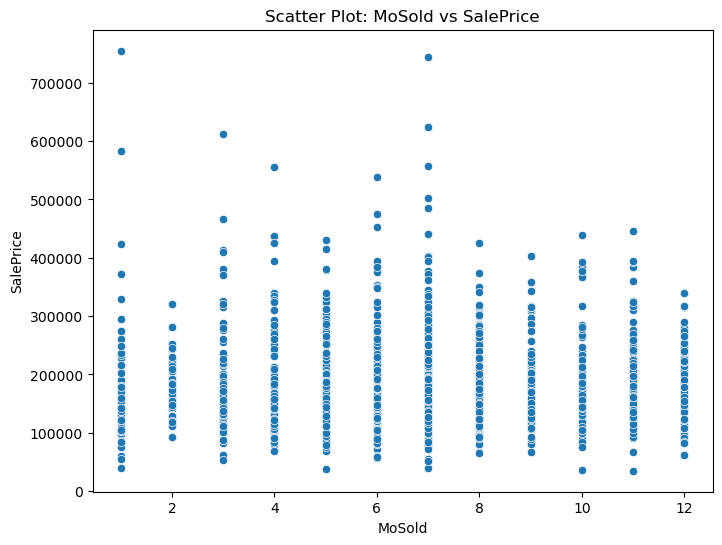

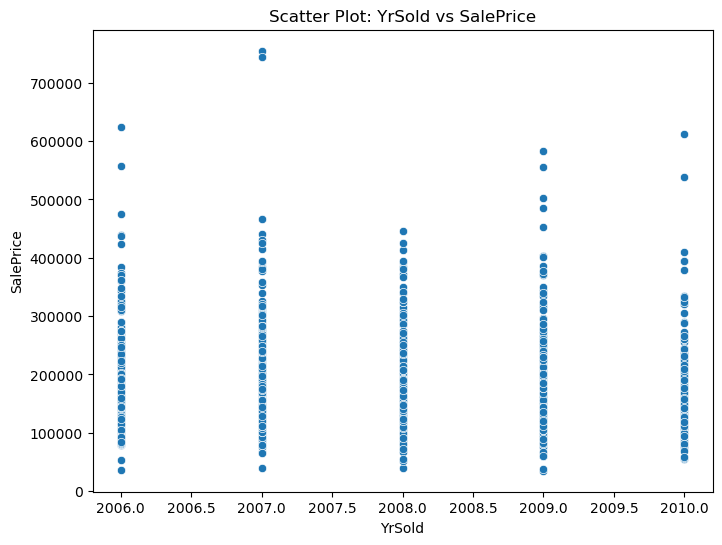

In [23]:
def scatter_plot(x_column, y_column,data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=df)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()


for column in Numerical:
    
    scatter_plot(column, 'SalePrice', df)

In [24]:
#Some of the columns doesnt have corelation between with Target varible hence we can drop some

In [25]:
df_numeric=df.select_dtypes(include=['float64', 'int64'])

In [26]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

In [27]:
# Extract the correlation values for 'SalePrice'
correlation_with_saleprice = correlation_matrix['SalePrice']

In [28]:
# Keep only the columns with correlation greater than 0.5 or less than -0.5
selected_columns = correlation_with_saleprice[(correlation_with_saleprice > 0.5) | (correlation_with_saleprice < -0.5)].index

len(selected_columns)

11

In [29]:
selected_columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [30]:
len(df_numeric.columns)

37

<Axes: >

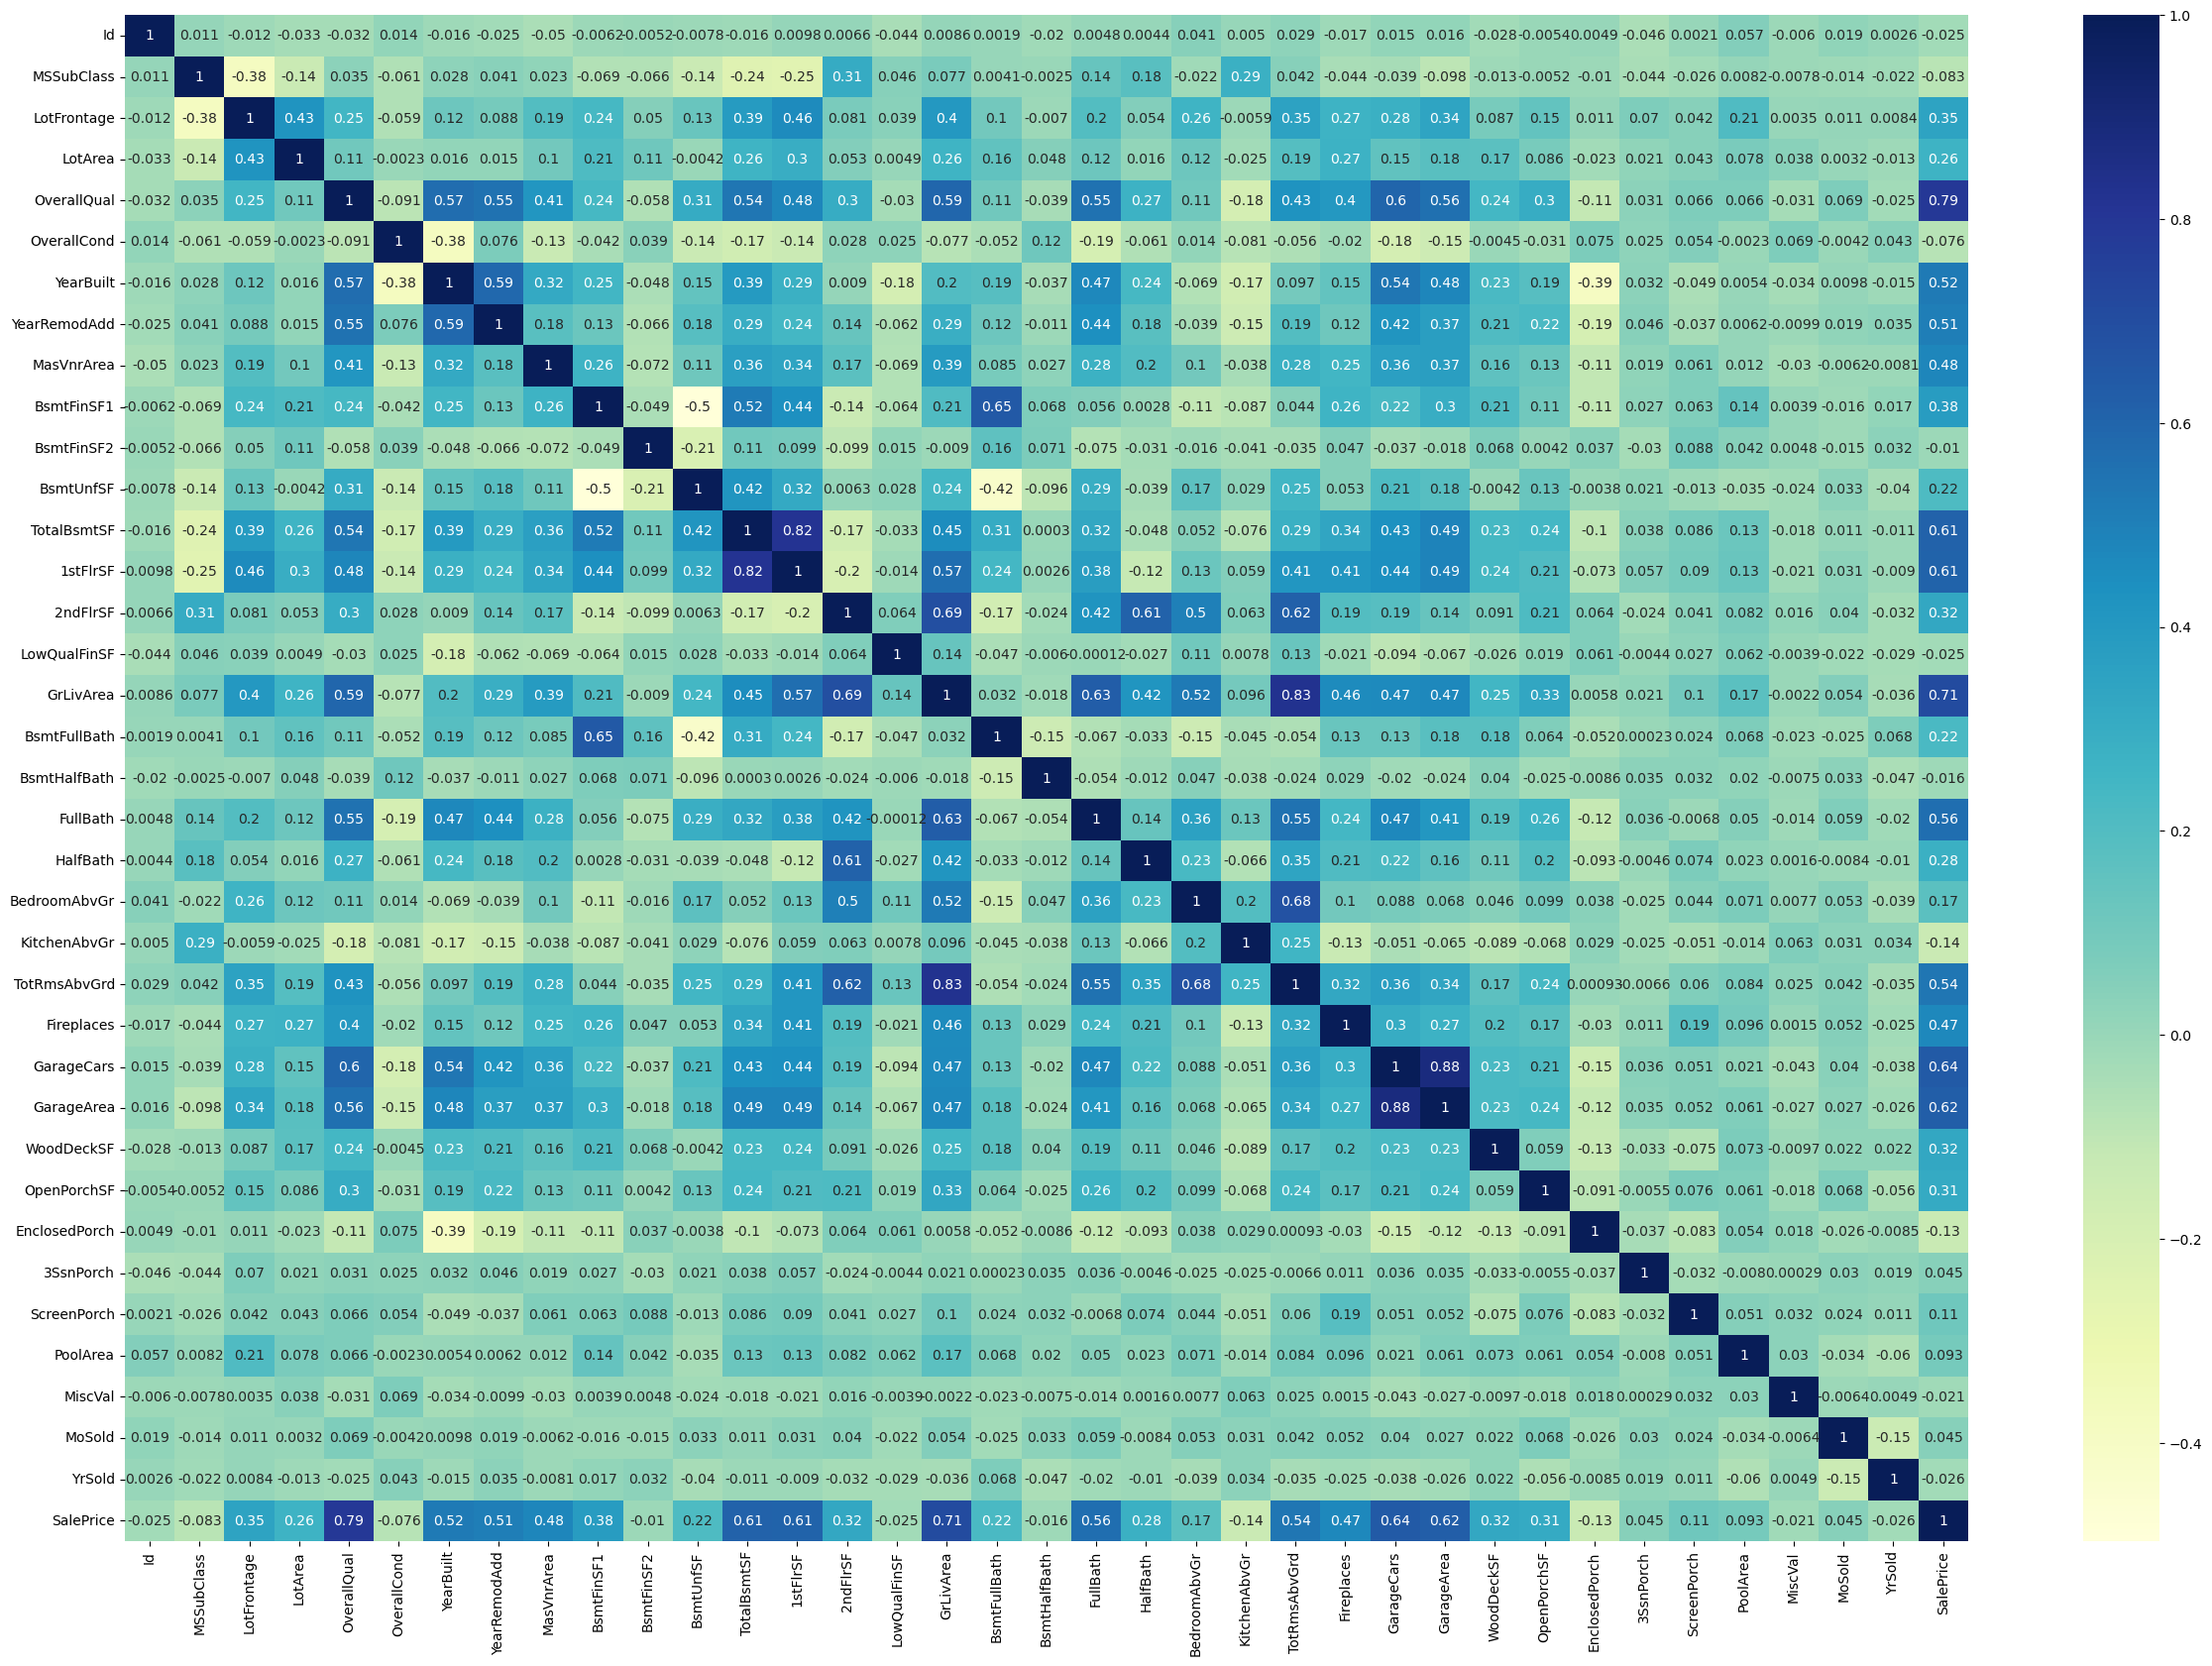

In [31]:

# figure size
plt.figure(figsize=(30,20))
sns.heatmap(df_numeric.corr(),cmap="YlGnBu", annot=True)

In [32]:
# We will drop the columns that are not correlated 

In [33]:
drop_columns=list(set(df_numeric.columns)-set(selected_columns))

In [34]:
df=df.drop(columns=drop_columns)

In [35]:
df.shape

(1451, 55)

In [36]:
#Now we will divide categorical and Numerical variables and Target variables for easy visualizations

In [37]:
Numerical = list(df.select_dtypes(include=['float64', 'int64']).columns)
Numerical.remove('SalePrice')

Categorical = list(df.select_dtypes(exclude=['float64', 'int64']).columns)
Target=['SalePrice']

In [38]:
# function for creating barplot for columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='SalePrice',data=df)
    plt.title(f'{column} vs SalePrice')

In [ ]:
for i in Categorical:
    plot_cat_columns(i)

In [ ]:
#Some useful insights are 1Fam is costing higher, 2.5 Fin cost higher, Roof Metal plays important role,ExterQual and Extercond plays important role in price, some neighbourhood have higher costs 

In [ ]:
# GarageYrBlt is an year but it is stored as object so we need to convert the column in to numerical and since it is not corelated we can drop the colums

In [ ]:

df = df.drop(['GarageYrBlt'], axis = 1)

# Data Preperation

In [ ]:
df.shape

In [ ]:
df = pd.get_dummies(df, drop_first=True )
df.head()

In [ ]:
df.shape

In [ ]:

X = df.drop(['SalePrice'], axis=1)

X.head()

In [ ]:
# Target Variable
y = df['SalePrice']

y.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#df['SalePrice']=scaler.fit_transform(df['SalePrice'])

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1337)

In [ ]:
scaler=StandardScaler()
X_train[Numerical]=scaler.fit_transform(X_train[Numerical])

In [ ]:
X_test[Numerical]=scaler.transform(X_test[Numerical])

In [ ]:
#since we have applied scaler transform and the data in sales price is skewed a bit we need to apply log transform for better interpretation
y_train=np.log1p(y_train)


In [ ]:
y_test=np.log1p(y_test)

# Model building and Evaluation

In [ ]:
# Running RFE 
# Since there are more than 237 variables for analysis, we will run RFE to select some that helps in predicting the target variable
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe

In [ ]:
# Check the rankings of the data
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
X_train_rfe = pd.DataFrame(X_train[col])

In [ ]:
X_train_rfe.head()

In [ ]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

In [ ]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

In [ ]:
# As you can see it worked well on Train data but for Test data is is not fitting well suggesting that the data is overfitted or didnt learn the pattern

In [ ]:
# Hence we will check some additional Regression techniques

##  Lasso and Ridge Regression

Let's now try predicting house prices and perform lasso and ridge regression.

### Lasso Regression

In [ ]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

In [ ]:
np.logspace(-4, 4, 500)

In [ ]:
# Applying Lasso

# list of alphas to tune
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000],  # we can use additional values also
    'max_iter': [100, 500, 1000]  # tuning the maximum number of iterations
}

lasso = Lasso()

# cross validation
folds = 5
model_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=folds,
    return_train_score=True,
    verbose=1
)

model_lasso.fit(X_train, y_train)


In [ ]:
# Print the best hyperparameters
print("Best hyperparameters:", model_lasso.best_params_)

best_lasso_model = model_lasso.best_estimator_



In [ ]:
best_lasso_model

In [ ]:
# cv_results and for visualization purpose 
results = pd.DataFrame(model_lasso.cv_results_)
results = results[results['param_alpha']<=1]
results.head()

In [ ]:
# plotting mean test and train scoes with alpha 
results['param_alpha'] = results['param_alpha'].astype('float64')

# plotting
plt.plot(results['param_alpha'], results['mean_train_score'])
plt.plot(results['param_alpha'], results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##Analyzing the graph, we observe that the Negative Mean Absolute Error reaches a notably low point at alpha = 0.4 and remains relatively stable thereafter. However, we opt for a lower alpha value to strike a balance between Bias and Variance, aiming to obtain coefficients for the smallest features.

In [ ]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

#### The efficacy of this approach is evident in the results, as Lasso effectively drives the coefficients of insignificant features to zero.

In [ ]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

In [ ]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
Lasso_r2_train=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
Lasso_r2_test=metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

In [ ]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [ ]:
#### The R2 values for Train and Test matches well, indicating an optimum model

In [ ]:
# Creating a dataframe for the coefficients obtained from Lasso
model = list(zip(cols, model_parameters))

In [ ]:
param = pd.DataFrame(model)
param.columns = ['Variable', 'Coeff']
param.head()

In [ ]:
# sort the coefficients in ascending order
param = param.sort_values((['Coeff']), axis = 0, ascending = False)
param

In [ ]:
# Will choose coefficients which are not zero to see which have predictive power to predict Sales price
pred = pd.DataFrame(param[(param['Coeff'] != 0)])
pred

In [ ]:
# These 14 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

In [ ]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

In [ ]:
# We dont want constant as this is not a feature that has ingested in to the Model
Lassso_var.remove('constant')

In [ ]:
Lassso_var

In [ ]:
X_train_lasso = X_train[Lassso_var]
                        
X_train_lasso.head()

In [ ]:
X_train_lasso.shape

In [ ]:
X_test_lasso = X_test[Lassso_var]
                        
X_test_lasso.head()

## Ridge Regression

In [ ]:
# Applying Lasso

# list of alphas to tune
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000],  # we can use additional values also
    'max_iter': [100, 500, 1000]  # tuning the maximum number of iterations
}

ridge = Ridge()

# cross validation
folds = 5
model_ridge = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=folds,
    return_train_score=True,
    verbose=1
)

model_ridge.fit(X_train, y_train)


In [ ]:
# Print the best hyperparameters
print("Best hyperparameters:", model_ridge.best_params_)

best_ridge_model = model_ridge.best_estimator_



In [ ]:
best_ridge_model

In [ ]:
results = pd.DataFrame(model_ridge.cv_results_)
results = results[results['param_alpha']<=1]
results.head()

In [ ]:
# plotting mean test and train scoes with alpha 
results['param_alpha'] = results['param_alpha'].astype('float64')

# plotting
plt.plot(results['param_alpha'], results['mean_train_score'])
plt.plot(results['param_alpha'], results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### since the Negative Mean Absolute Error stabilises at alpha = 0.3, we will choose this for further analysis

In [ ]:
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

In [ ]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

In [ ]:
# ridge regression
lm = Ridge(alpha=0.3)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
ridge_r2_train=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
ridge_r2_test=metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

In [ ]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

#### It is visible that the model performance is better than Lasso.  The train and the test scores are matching well

In [ ]:
# Create a dataframe for Ridge Coefficients
model_ridge = list(zip(cols, model_parameters))

In [ ]:
para_rid = pd.DataFrame(model_ridge)
para_rid.columns = ['Variable', 'Coeff']
res=para_rid.sort_values(by=['Coeff'], ascending = False)
res.head(20)

In [ ]:
# Sorting the coefficients in ascending order
para_rid = para_rid.sort_values((['Coeff']), axis = 0, ascending = False)
para_rid

In [ ]:
## We will remove features with no impact that is coeff =0
para_rid = pd.DataFrame(para_rid[(para_rid['Coeff'] != 0)])
para_rid

In [ ]:
para_rid.shape

### Observation:
#### The model performance by Ridge Regression was better in terms of R2 values of Train and Test, However we will use Lasso Model because Model Interpretability is better in Lasso and since there are more features. If you suspect that only a subset of features is truly important, Lasso may be more suitable.

#### It is always advisable to use simple yet robust model.

### INFERENCE LASSO MODEL




#### The higher values of positive coeeficients suggest a high sale value and more the importance of the featuere

#### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  OverallQual  |  Rates the overall material and finish of the house |
 |  GrLivArea  |  Above grade (ground) living area square feet |
 |  GarageCars  |  Size of garage in car capacity  |
 |  MSZoning_RL  |  Identifies the general zoning classification of the sale  |
 |  YearRemodAdd   |Remodel date   |
        
#### The higher values of negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  BsmtFinType1  |  Rating of basement finished area  |
   |  FireplaceQu_none  |  Fireplace quality, if there is no fire place  |
    




### INFERENCE RIDGE MODEL




#### The higher values of positive coeeficients suggest a high sale value and more the importance of the featuere

#### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  RoofMatl  |  Roof material |
 |  MSZoning  |   Identifies the general zoning classification of the sale. |
 |  Condition2_PosA  |  Proximity to various conditions (if more than one is present)  |
 
        
#### The higher values of negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  Condition2_PosN  |  Proximity to various conditions (if more than one is present)   |
   |  Functional_Maj2  |  Home functionality (Assume typical unless deductions are warranted)  |
    




In [ ]:
# Metrices of Testing dataset(Lasso Model):
print("Test dataset R^2           : ",Lasso_r2_test)
print("Train dataset R^2          : ",Lasso_r2_train) 
    
# Metrices of Testing dataset(Ridge Model):
print("Test dataset R^2           : ",ridge_r2_test)
print("Train dataset R^2          : ",ridge_r2_train) 
